Непараметрическая регрессия
===========================




In [1]:
import numpy as np
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

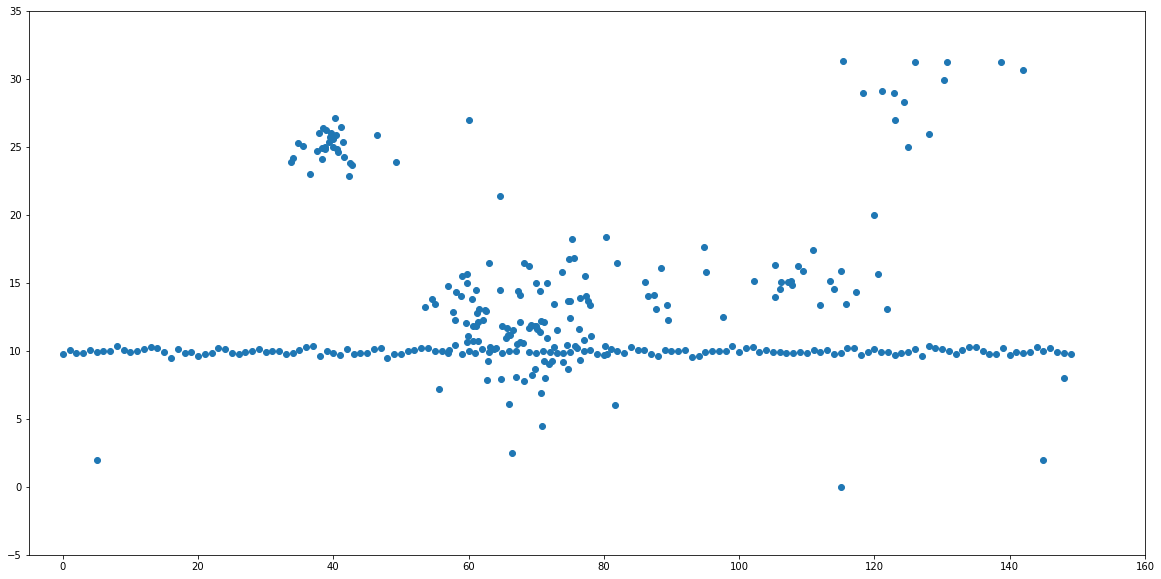

In [35]:
# Dataset

dataset_y = np.random.normal(10.0, 0.2, size=150)
dataset_x = np.array(range(0, len(dataset_y)))

p1 = 30
x1 = np.random.normal(100.0, 20.0, size=p1)
y1 = np.random.normal(15.0, 1.0, size=p1)

dataset_x = np.append(dataset_x, x1)
dataset_y = np.append(dataset_y, y1)

p2 = 30
x2 = np.random.normal(40.0, 4.0, size=p2)
y2 = np.random.normal(25.0, 1.0, size=p2)

dataset_x = np.append(dataset_x, x2)
dataset_y = np.append(dataset_y, y2)

p3 = 100
x3 = np.random.normal(70.0, 7.0, size=p3)
y3 = np.random.normal(12.0, 3.0, size=p3)

p4 = 10
x4 = np.random.normal(130.0, 10.0, size=p4)
y4 = np.random.normal(30.0, 1.0, size=p4)

dataset_x = np.append(dataset_x, x3)
dataset_y = np.append(dataset_y, y3)

dataset_x = np.append(dataset_x, x4)
dataset_y = np.append(dataset_y, y4)

dataset_x = np.append(dataset_x, [125, 128, 123, 145, 148, 115, 120, 60, 5])
dataset_y = np.append(dataset_y, [25, 26, 27, 2, 8, 0, 20, 27, 2])

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(dataset_x, dataset_y)

plt.xlim([-5.0, 160.0])
plt.ylim([-5.0, 35.0])
# Points min & max
#ax.scatter([0, 150], [0, 30], edgecolors = 'none', facecolors='none')
plt.show()

In [36]:
def dist(x1: float, x2: np.ndarray) -> np.ndarray: 
    return abs(x1 - x2)
    
def gaussian(u: np.ndarray) -> np.ndarray:
    return 1/np.sqrt(2 * np.pi) * np.power(np.e, -0.5 * u**2)
    
def quartic(u: np.ndarray) -> np.ndarray:
    return (1 - u**2)**2 * (abs(u) <= 1)
    
def sse(data, target, h):
    result = sum([(predict_gaussian(data[i], data, target, h) - target[i])**2 for i in range(0, len(data))])
    return result

def sse_q(data, target, h):
    result = sum([(predict_quartic(data[i], data, target, h) - target[i])**2 for i in range(0, len(data))])
    return result
    
def predict_gaussian(x, data, target, h):
    r = dist(x, data) / h                    # array
    first = sum(target * gaussian(r))        # number
    second = sum(gaussian(r))                # number
    res = first / second                     # number
    return res

def predict_quartic(x, data, target, h):
    r = dist(x, data) / h
    first = sum(target * quartic(r))
    second = sum(quartic(r))
    res = first / second
    return res

# Регрессия с использованием Гауссового ядра #

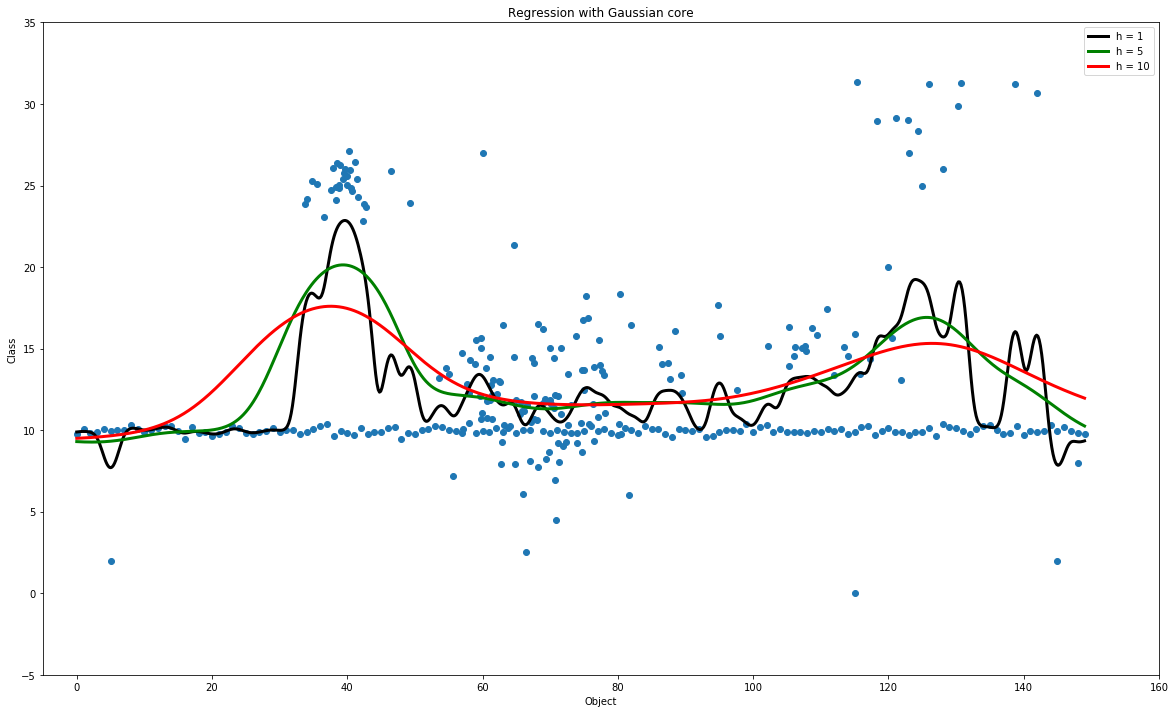

SSE for H = 1: 6551.527353870608
SSE for H = 5: 7713.277665532558
SSE for H = 10: 8530.515195904289


In [37]:
values = np.linspace(np.min(dataset_x), np.max(dataset_x), num=800)
h = np.array([1, 5, 10]) # width of window
colors = np.array(['black', 'green', 'red'])

results = [] # alpha{h}

for i in range(0, len(h)):
    results.append([])

for i in range(0, len(h)):
    temp = np.array([predict_gaussian(val, dataset_x, dataset_y, h[i]) for val in values])
    results[i] = np.append(results[i], temp)

#results1 = np.array([predict_gaussian(val, dataset_x, dataset_y, h1) for val in values])

fig, ax = plt.subplots(figsize=(20, 12))

ax.scatter(dataset_x, dataset_y)
ax.set(title = 'Regression with Gaussian core',
      xlabel = 'Object',
      ylabel = 'Class')
#ax.plot(values, results1, color='black', linewidth=2)

for i in range(0, len(h)):
    line = plt.plot(values, results[i], color=colors[i], linewidth=3, label='h = %.0f' % h[i])
#line2 = plt.plot(values, results2, color='red', linewidth=3, label='h = 3')

plt.legend()

plt.xlim([-5.0, 160.0])
plt.ylim([-5.0, 35.0])

plt.show()

#print('SSE for H2: %' % sse(dataset_x, dataset_y, h2))
for i in range(0, len(h)):
    print('SSE for H = {0}: {1}'.format(h[i], sse(dataset_x, dataset_y, h[i])))

# Регрессия с использованием квартического ядра #

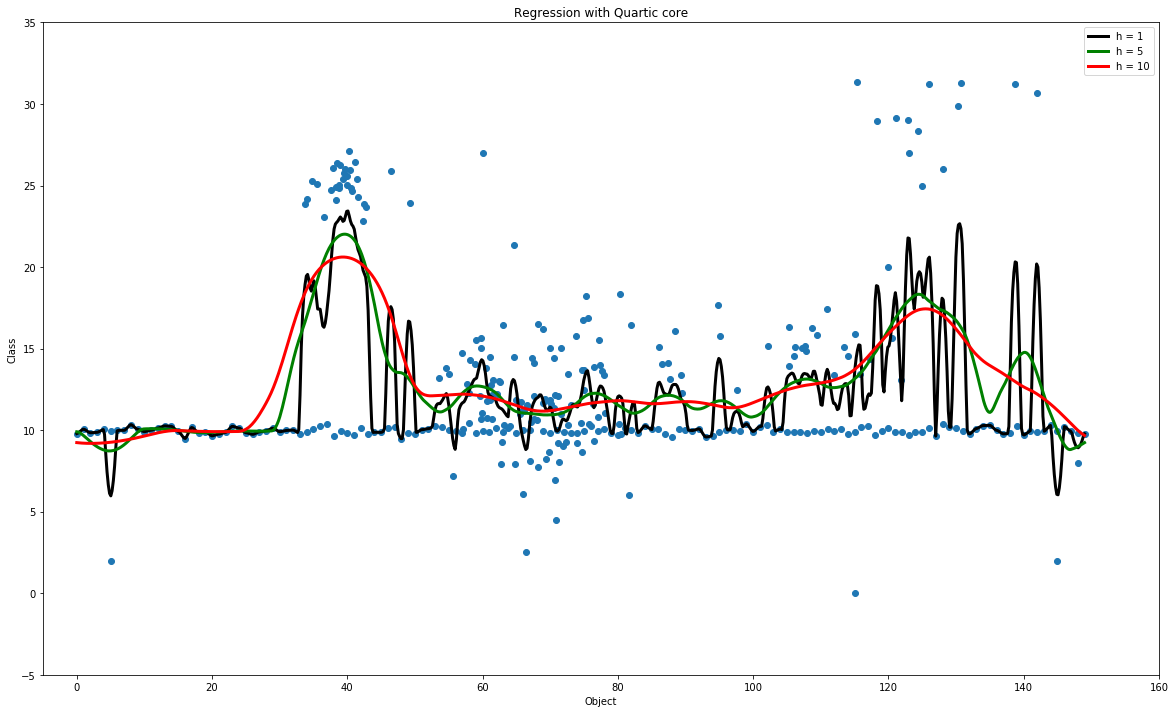

SSE for H = 1: 5694.873108745612
SSE for H = 5: 7112.1522332056575
SSE for H = 10: 7565.337590818161


In [38]:
values = np.linspace(np.min(dataset_x), np.max(dataset_x), num=800)
h = np.array([1, 5, 10]) # width of window
colors = np.array(['black', 'green', 'red'])

results_q = [] # alpha{h}

for i in range(0, len(h)):
    results_q.append([])

for i in range(0, len(h)):
    temp = np.array([predict_quartic(val, dataset_x, dataset_y, h[i]) for val in values])
    results_q[i] = np.append(results_q[i], temp)

#results1 = np.array([predict_gaussian(val, dataset_x, dataset_y, h1) for val in values])

fig, ax = plt.subplots(figsize=(20, 12))

ax.scatter(dataset_x, dataset_y)
ax.set(title = 'Regression with Quartic core',
      xlabel = 'Object',
      ylabel = 'Class')
#ax.plot(values, results1, color='black', linewidth=2)

for i in range(0, len(h)):
    line = plt.plot(values, results_q[i], color=colors[i], linewidth=3, label='h = %.0f' % h[i])
#line2 = plt.plot(values, results2, color='red', linewidth=3, label='h = 3')

plt.legend()

plt.xlim([-5.0, 160.0])
plt.ylim([-5.0, 35.0])

plt.show()

#print('SSE for H2: %' % sse(dataset_x, dataset_y, h2))
for i in range(0, len(h)):
    print('SSE for H = {0}: {1}'.format(h[i], sse_q(dataset_x, dataset_y, h[i])))

# LOWESS #

In [39]:
dataset_y = np.random.normal(10.0, 0.2, size=150)
dataset_x = np.array(range(0, len(dataset_y)))

p1 = 30
x1 = np.random.normal(100.0, 20.0, size=p1)
y1 = np.random.normal(15.0, 1.0, size=p1)

dataset_x = np.append(dataset_x, x1)
dataset_y = np.append(dataset_y, y1)

p2 = 30
x2 = np.random.normal(40.0, 4.0, size=p2)
y2 = np.random.normal(25.0, 1.0, size=p2)

dataset_x = np.append(dataset_x, x2)
dataset_y = np.append(dataset_y, y2)

p3 = 100
x3 = np.random.normal(70.0, 7.0, size=p3)
y3 = np.random.normal(12.0, 3.0, size=p3)

p4 = 10
x4 = np.random.normal(130.0, 10.0, size=p4)
y4 = np.random.normal(30.0, 1.0, size=p4)


d_x = np.append(d_x, x3)
d_y = np.append(d_y, y3)

d_x = np.append(d_x, x4)
d_y = np.append(d_y, y4)

d_x = np.append(d_x, [125, 128, 123, 145, 148, 115, 120, 60, 5])
d_y = np.append(d_y, [25, 26, 27, 2, 8, 0, 20, 27, 2])

sc = StandardScaler()
d_x = d_x.reshape((d_x.shape[0], 1))
d_x = sc.fit_transform(d_x)
d_y = d_y.reshape((d_y.shape[0], 1))
d_y = sc.fit_transform(d_y)
d_x = np.ravel(d_x)
d_y = np.ravel(d_y)
#print(d_x)
#print(d_y)

In [40]:
def predict_lowess(x, data, target, h):
    delta = np.ones(len(data)) # [1, 1, 1,..., 1]
    y = np.array([predict_gaussian(x, data, target, h) for x in data])
    for i in range(1, 4):
        #if i != 1: y = np.array([predict_gaussian(x, data, y, h) for x in data])
        y = y * delta
        eps = abs(y - target)
        new_delta = quartic(eps/(6*np.median(eps))) # quartic(e/6*med{e})
        if abs(sum(delta) - sum(new_delta)) <= 1e-3:
            break
        delta = new_delta
    
    r = dist(x, data) / h
    first = sum(target * gaussian(r) * delta)
    second = sum(gaussian(r))
    res = first / second
    return res

def predict_lowess_another_eps(x, data, target, h):
    delta = np.ones(len(data)) # [1, 1, 1,..., 1]
    y = np.array([predict_gaussian(x, data, target, h) for x in data])
    for i in range(1, 4):
        #if i != 1: y = np.array([predict_gaussian(x, data, y, h) for x in data])
        y = y * delta
        eps = abs(y - target)
        #eps_av = np.average(eps)
        new_delta = quartic(eps) # quartic(e)
        if abs(sum(delta) - sum(new_delta)) <= 1e-3:
            break
        delta = new_delta
    
    r = dist(x, data) / h
    first = sum(target * gaussian(r) * delta)
    second = sum(gaussian(r))
    res = first / second
    return res

[0.   0.05 0.1  0.15]


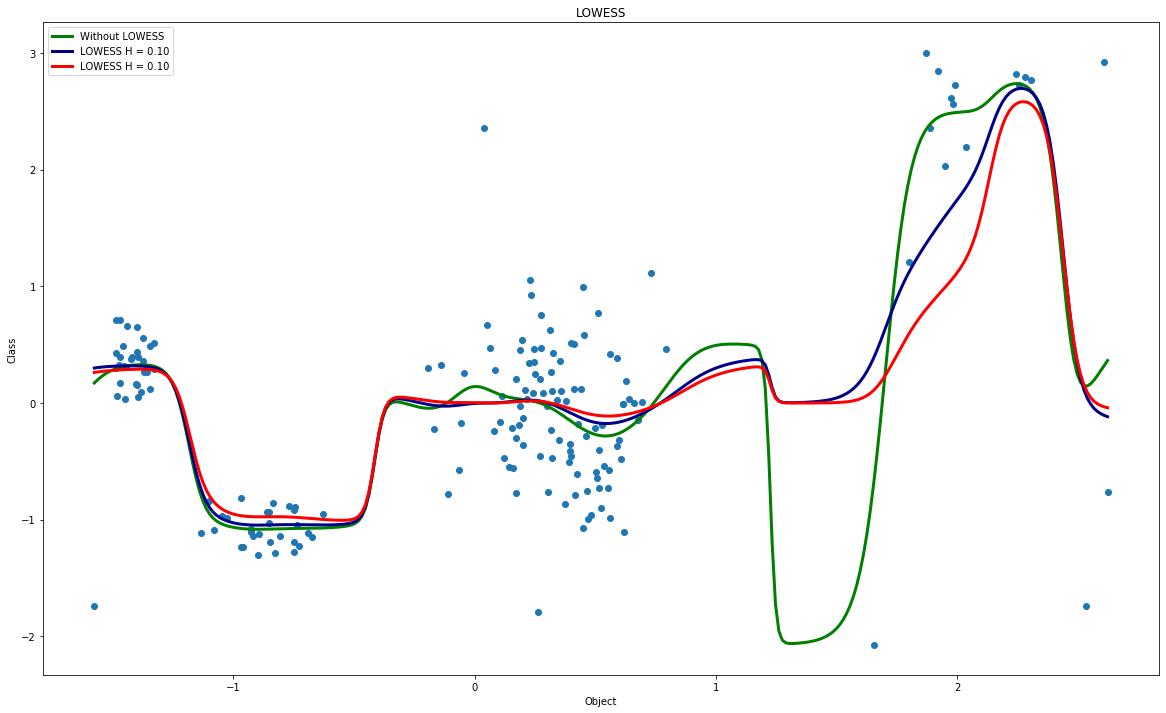

In [41]:
values = np.linspace(np.min(d_x), np.max(d_x), num=300)

#h = np.array([1, 5, 10]) # width of window (h-array)
h = np.array(range(0, 4, 1))
h = h/20
print(h)
colors = np.array(['black', 'green', 'darkblue', 'red'])

h_num = 2 # for change H from h-array

results_no_low = np.array([predict_gaussian(val, d_x, d_y, h[h_num]) for val in values])
results_low1 = np.array([predict_lowess(val, d_x, d_y, h[2]) for val in values])
results_low2 = np.array([predict_lowess_another_eps(val, d_x, d_y, h[2]) for val in values])

fig, ax = plt.subplots(figsize=(20, 12))

ax.scatter(d_x, d_y)
#ax.set(title = 'LOWESS for h = %.2f' % h[h_num],
ax.set(title = 'LOWESS',
      xlabel = 'Object',
      ylabel = 'Class')

#plt.title('LOWESS for h = %.0f' % h[h_num])

plt.plot(values, results_no_low, color=colors[1], linewidth=3, label='Without LOWESS')
plt.plot(values, results_low1, color=colors[2], linewidth=3, label='LOWESS H = %.2f' % h[2])
plt.plot(values, results_low2, color=colors[3], linewidth=3, label='LOWESS H = %.2f' % h[2])

plt.legend()

#plt.xlim([-2.0, 2.0])
#plt.ylim([-2.0, 2.0])

plt.show()